In [3]:
%matplotlib inline
import numpy as np;
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(1337)

kwargs = {'linewidth' : 3.5}
font = {'weight' : 'normal', 'size'   : 24}
matplotlib.rc('font', **font)

def error_plot(ys, yscale='log'):
    plt.figure(figsize=(8, 8))
    plt.xlabel('Step')
    plt.ylabel('Error')
    plt.yscale(yscale)
    plt.plot(range(len(ys)), ys, **kwargs)

$\LaTeX \text{ commands here}
\newcommand{\R}{\mathbb{R}}
\newcommand{\im}{\text{im}\,}
\newcommand{\norm}[1]{||#1||}
\newcommand{\inner}[1]{\langle #1 \rangle}
\newcommand{\span}{\mathrm{span}}
\newcommand{\proj}{\mathrm{proj}}
\newcommand{\OPT}{\mathrm{OPT}}
\newcommand{\grad}{\nabla}
\newcommand{\eps}{\varepsilon}
$

<hr style="border: 5px solid black">

**Georgia Tech, CS 4540**

# L9: Gradient Descent Algorithm

Jake Abernethy, Benjamin Bray, Naveen Kodali

*Tuesday, September 18, 2018*

# Danger!

> **Warning:**  In this lecture, we will abuse notation and pretend that $\nabla f(x)$ is a column vector.  Always remember that it's *actually* a row vector, and we're just pretending!!!

### Gradient Descent

For $f : \R^d \rightarrow \R$ is differentiable, **gradient descent** performs the following iteration:  follows the direction of steepest descent from a starting point $x_0 \in \R^d$:

<div style="padding:20px;margin:20px;border:1px solid black">
<b>Gradient Descent</b>
$$
\begin{align}
x_{t+1} = x_t - \eta_t \grad f(x_t)
\end{align}
$$
</div>

* Initial iterate $x_0 \in \R^d$
* $-\grad f(x_t)$ is the direction of steepest descent from $x_t$
* $\eta > 0$ is called the *step size*

### Gradient Descent for Quadratic Forms

In the reading, we have the following result. Assume we want to optimize the function $f(x) = \frac 1 2 x^\top A x - b^\top x + c$. Then the method of Gradient Descent (aka Steepest Decent) satisfies the following convergence rate. If we define the error term $e_{(i)} := x^* - x_{(i)}$, then we have the *error term* $\| e_{(t)} \|_A := \sqrt{e_{(t)}^\top A e_{(t)}}$ decreasing at the following rate:
$$
    \| e_{(t)} \|_A \leq \left(\frac{\kappa - 1}{\kappa + 1}\right)^t \| e_{(0)} \|_A
$$
where $\kappa$ is the *spectral gap*, defined by $\frac{\lambda_{\text{max}}(A)}{\lambda_{\text{min}}(A)}$.

**Note**: The quadratice case is, in some sense, too easy! What about for arbitrary convex functions?

### Problem:  Lipschitz Continuity

A function $f : \Omega \rightarrow \R$ is **$L$-Lipschitz continuous** on its domain $\Omega \subset \R^d$ provided that

$$
| f(x) - f(y) | \leq L \norm{x - y}_2 \quad \forall\, x,y \in \Omega
$$


<div style="padding:20px;margin:20px;border:1px solid black">
<b>Part A:</b>  Give an example of a function that is not Lipschitz on $\R^d$ but is Lipschitz on a subset.

<b>Part B:</b>  Prove that a Lipschitz continuous function is continuous, that is, for all $x_0 \in \R^d$ and $\eps > 0$ there exists $\delta > 0$ such that for all $x \in \R^d$, $$\norm{x-x_0} < \delta \implies |f(x)-f(x_0)| < \eps$$

<b>Part C:</b>  Prove that if $f$ is differentiable, convex, and $L$-Lipschitz, then $\norm{\grad f(x)}_2 \leq L$.


</div>

### Gradient Descent for Lipschitz Continuous Functions

Our goal for today is to prove the following:

<div style="padding:20px;margin:20px;border:1px solid black">
<b>Theorem:</b> If $f : \R^d \rightarrow \R$ is convex, differentiable and L-Lipschitz on all of $\R^d$ and $||x_0 - x^*|| \leq R$, then there is a step size $\eta > 0$ such that the iterates of gradient descent satisfy
$$
f\left(\frac{1}{t}\sum_{i=1}^{t}x_i\right) - f(x^*) \leq \frac{R L}{\sqrt{t}}
$$
</div>

### Step 1

Show that 
$$f(x_t) - f(x^*) \leq \frac{1}{2\eta} \left(||x_t - x^*||^2 - ||x_{t+1} - x^*||^2\right) + \frac{\eta L^2}{2}$$

> *Hint:*  First, show that $u^T v = \frac{1}{2} (||u||^2 + ||v||^2 - ||u - v||^2)$ for any $u, v \in \R^d$

### Step 2

Using the previous step, prove for any $\eta > 0$ that

$$f\left(\frac{1}{t}\sum_{i=0}^{t}x_i\right) - f(x^*) \leq \frac{R^2}{2\eta t} + \frac{\eta L^2 t}{2}$$

> *Hint:* Sum over iterates and identify a telescoping sum.  Then, use Jensen's inequality (i.e. the definition of convexity).


### Step 3

Now we have

$$f\left(\frac{1}{t}\sum_{i=0}^{t}x_i\right) - f(x^*) \leq \frac{R^2}{2\eta t} + \frac{\eta L^2 t}{2}$$



**Show** Since this holds for all $\eta > 0$, we should pick the step size that gives the best bound.  Which $\eta$ should we choose?  What bound does it give?

(Solution:  $\eta = \frac{R}{L \sqrt{t}}$)

### Conclusion:  Lipschitz Case

Using $\eta = \frac{R}{L \sqrt{t}}$, we obtain the following bound:

$$
f\left(\frac{1}{t}\sum_{i=0}^{t}x_i\right) - f(x^*) \leq \frac{R L}{\sqrt{t}}
$$

* Lipschitz continuity is a fairly weak assumption
* By imposing stronger conditions, we can get better convergence rates

### Remark:  Projected Gradient Descent

Suppose we want to minimize $f : \Omega \rightarrow \R$ within some convex set $\Omega \subset \R^d$ instead of the entire space $\R^d$.  We can still apply gradient descent as long as we **project** back onto the convex domain $\Omega$ after each iteration:


<div style="padding:20px;margin:20px;border:1px solid black">
<b>Projected Gradient Descent</b>
$$
\begin{align}
y_{t+1} &= x_t - \eta_t \grad f(x_t) \\
x_{t+1} &= \Pi_\Omega(y_{t+1})
\end{align}
$$
</div>

Here, $\Pi_\Omega(x) = \min_{z \in \Omega} \norm{z-x}_2^2$ projects onto the convex set $\Omega$.

> **Problem:** Show that Projected Gradient Descent achieves the same convergence rate by making a minor adjusment to the proof.

### Def:  Smooth / Strongly Convex

Recall that a function is convex if it is lower bounded by its linear approximation at every point. But a function is *strongly convex* if it is also lower bounded by a *quadratic* approximation as well. More precisely, we say $f(x)$ is $\alpha$-strongly convex if the following holds for every $x, x_0 \in \text{dom}(f)$:
$$ f(x) \geq f(x_0) + \nabla_{x_0} f \cdot (x - x_0) + \frac \alpha 2 \| x - x_0 \|^2 $$
Similarly, a convex function is called $\beta$-smooth if the inequality goes the other way!
$$ f(x) \leq f(x_0) + \nabla_{x_0} f \cdot (x - x_0) + \frac \beta 2 \| x - x_0 \|^2 $$

+ **Equivalently** a twice-differentiable $f(x)$ is $\alpha$-strongly convex iff $\nabla^2_x f \succcurlyeq \alpha I$
+ **and** a twice-differentiable $f(x)$ is $\beta$-smooth iff $\nabla^2_x f \preccurlyeq \beta I$


### Problem:  Quadratic Forms

<div style="padding:20px;margin:20px;border:1px solid black">
Let $A \in \R^{d \times d}$ be symmetric and positive-definite and define $f(x) = \frac{1}{2} x^T A x$.  

* Is $f$ smooth?  If so, with what smoothness constant?
* Is $f$ strongly convex?  If so, with what constant?
</div>

# Implementation

> Adapted from [Moritz Hardt's lecture notebook](https://ee227c.github.io/code/lecture4.html)


## Projected Gradient Descent

We start with a basic implementation of projected gradient descent.  Note that this implementation keeps around all points computed along the way. This is clearly not what you would do on large instances. We do this for illustrative purposes to be able to easily inspect the computed sequence of points.

In [4]:
def gradient_descent(init, steps, grad, proj=lambda x: x):
    """Projected gradient descent.
    
    Inputs:
        initial: starting point
        steps: list of scalar step sizes
        grad: function mapping points to gradients
        proj (optional): function mapping points to points
        
    Returns:
        List of all points computed by projected gradient descent.
    """
    xs = [init]
    for step in steps:
        x_step = xs[-1]
        x_update = None
        xs.append(x_update)
    return xs

## Warm-Up:  Optimizing a Quadratic

As a toy example, let's optimize $f(x) = \frac{1}{2} \norm{x}^2$, which has gradient $\nabla f(x) = x$.

In [5]:
def quadratic(x):
    return 0.5*x.dot(x)


# What is the gradient of this function?
def quadratic_gradient(x):
    return None


Note the function is  1-smooth and  1-strongly convex. Our theorems would then suggest that we use a constant step size of  1.  If you think about it, for this step size the algorithm will actually find the optimal solution in just one step.

In [7]:
x0 = np.random.normal(0, 1, (1000))
_, x1 = gradient_descent(x0, [1.0], quadratic_gradient)

Indeed, it does:

In [8]:
x1.all() == 0

True

Let's see what happens if we don't have the right learning rate.

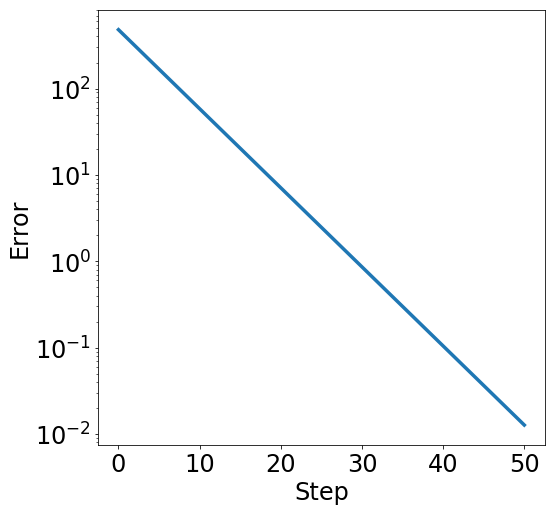

In [9]:
xs = gradient_descent(x0, [0.1]*50, quadratic_gradient)
error_plot([quadratic(x) for x in xs])

### Constrained Optimization

Let's say we want to optimize the function inside some affine subspace. Recall that affine subspaces are convex sets. Below we pick a random low dimensional affine subspace  b+U  and define the corresponding linear projection operator.

In [ ]:
# U is an orthonormal basis of a random 100-dimensional subspace.
U = np.linalg.qr(np.random.normal(0, 1, (1000, 100)))[0]
b = np.random.normal(0, 1, 1000)

def proj(x):
    """Projection of x onto an affine subspace"""
    return None
# What is this???

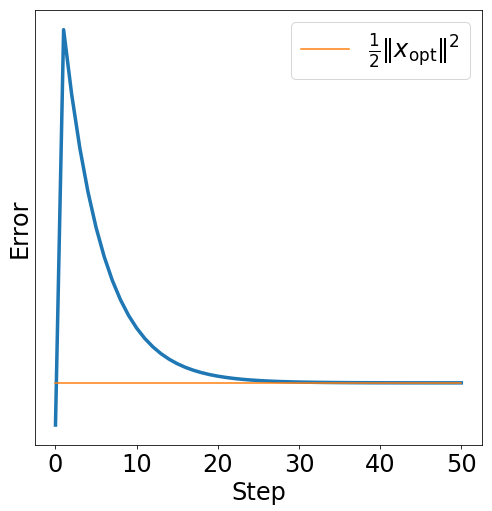

In [11]:
x0 = np.random.normal(0, 1, (1000))
xs = gradient_descent(x0, [0.1]*50, quadratic_gradient, proj)
# the optimal solution is the projection of the origin
x_opt = proj(0)
error_plot([quadratic(x) for x in xs])
plt.plot(range(len(xs)), [quadratic(x_opt)]*len(xs),
        label='$\\frac{1}{2}|\!|x_{\mathrm{opt}}|\!|^2$')
plt.legend()

The orangle line shows the optimal error, which the algorithm reaches quickly. The iterates also converge to the optimal solution in domain as the following plot shows.

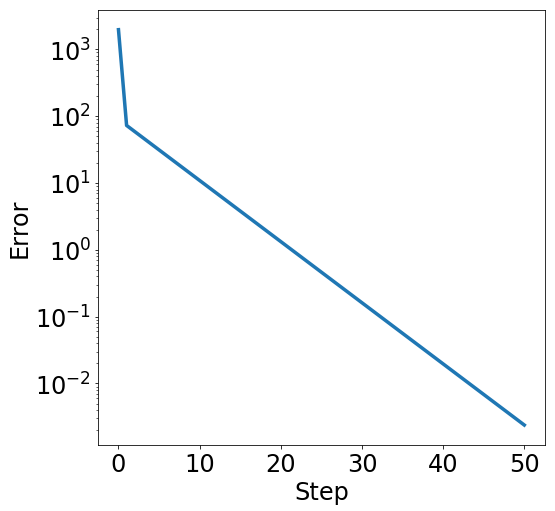

In [12]:
error_plot([np.linalg.norm(x_opt-x)**2 for x in xs])